In [1387]:
import pathlib
import os
import shutil
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [1388]:
model = Sequential([
    Input(shape=(32, 32, 1)),
    Conv2D(filters=6, kernel_size=(5,5),  activation='sigmoid', padding='same'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=16, kernel_size=(5,5),  activation='sigmoid',  padding='same'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(120, activation='sigmoid'),
    Dense(84, activation='sigmoid'),
    Dense(28, activation='softmax')
])

In [1389]:
# preprocess images

for label in range(1, 29):
    dir = "dataset/set1p/train/" + str(label).zfill(2)
    if os.path.exists(dir) is False:
        os.makedirs(dir)
    for file in os.listdir("dataset/set1/train/train"):
        filename = os.fsdecode(file)
        if (filename.endswith(f'_{label}.png')):
            print(filename)
            shutil.copyfile(src="dataset/set1/train/train/" + filename, dst=dir+"/" + filename)


id_4930_label_1.png
id_10086_label_1.png
id_3364_label_1.png
id_10980_label_1.png
id_4036_label_1.png
id_3592_label_1.png
id_2920_label_1.png
id_11876_label_1.png
id_229_label_1.png
id_9637_label_1.png
id_2241_label_1.png
id_9858_label_1.png
id_452_label_1.png
id_12099_label_1.png
id_8291_label_1.png
id_7396_label_1.png
id_11205_label_1.png
id_1570_label_1.png
id_10312_label_1.png
id_7848_label_1.png
id_677_label_1.png
id_12323_label_1.png
id_8519_label_1.png
id_9412_label_1.png
id_2692_label_1.png
id_8067_label_1.png
id_3141_label_1.png
id_9191_label_1.png
id_4263_label_1.png
id_8961_label_1.png
id_1349_label_1.png
id_5827_label_1.png
id_8072_label_1.png
id_5380_label_1.png
id_11429_label_1.png
id_1793_label_1.png
id_5832_label_1.png
id_7175_label_1.png
id_4258_label_1.png
id_4708_label_1.png
id_10307_label_1.png
id_5603_label_1.png
id_12996_label_1.png
id_6500_label_1.png
id_6050_label_1.png
id_2248_label_1.png
id_12774_label_1.png
id_10759_label_1.png
id_1127_label_1.png
id_903_labe

In [1390]:
for label in range(1, 29):
    dir = "dataset/set1p/test/" + str(label).zfill(2)
    if os.path.exists(dir) is False:
        os.makedirs(dir)
    for file in os.listdir("dataset/set1/test/test"):
        filename = os.fsdecode(file)
        if (filename.endswith(f'_{label}.png')):
            print(filename)
            shutil.copyfile(src="dataset/set1/test/test/" + filename, dst=dir+"/" + filename)


id_2241_label_1.png
id_2353_label_1.png
id_1570_label_1.png
id_954_label_1.png
id_2746_label_1.png
id_1681_label_1.png
id_1793_label_1.png
id_2521_label_1.png
id_3138_label_1.png
id_57_label_1.png
id_2857_label_1.png
id_225_label_1.png
id_617_label_1.png
id_2074_label_1.png
id_337_label_1.png
id_394_label_1.png
id_562_label_1.png
id_1345_label_1.png
id_1402_label_1.png
id_2018_label_1.png
id_1122_label_1.png
id_2297_label_1.png
id_1961_label_1.png
id_3026_label_1.png
id_2634_label_1.png
id_1569_label_1.png
id_3194_label_1.png
id_2914_label_1.png
id_3137_label_1.png
id_58_label_1.png
id_2858_label_1.png
id_3025_label_1.png
id_1962_label_1.png
id_1401_label_1.png
id_1121_label_1.png
id_1513_label_1.png
id_1346_label_1.png
id_561_label_1.png
id_226_label_1.png
id_114_label_1.png
id_2522_label_1.png
id_1682_label_1.png
id_2745_label_1.png
id_2298_label_1.png
id_674_label_1.png
id_2017_label_1.png
id_618_label_1.png
id_2242_label_1.png
id_338_label_1.png
id_1234_label_1.png
id_506_label_1.p

In [1391]:
#generate dbs
test_db = tf.keras.utils.image_dataset_from_directory("dataset/set1p/test/", image_size=(32,32), batch_size=1, color_mode='grayscale')
train_db = tf.keras.utils.image_dataset_from_directory("dataset/set1p/train/", image_size=(32,32), batch_size=1, color_mode='grayscale')

Found 3360 files belonging to 28 classes.
Found 15939 files belonging to 28 classes.


In [1392]:
test_db
train_db

<_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [1393]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_138"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_393 (Conv2D)         (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d_272 (Aver  (None, 16, 16, 6)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_394 (Conv2D)         (None, 16, 16, 16)        2416      
                                                                 
 average_pooling2d_273 (Aver  (None, 8, 8, 16)         0         
 agePooling2D)                                                   
                                                                 
 flatten_137 (Flatten)       (None, 1024)              0         
                                                                 
 dense_406 (Dense)           (None, 120)            

In [1394]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(train_db, epochs=20, 
    callbacks=callbacks)

Epoch 1/20
 9430/15939 [================>.............] - ETA: 10s - loss: 2.6949 - accuracy: 0.1872

KeyboardInterrupt: 

In [ ]:
print(len(np.concatenate([y for x, y in test_db], axis=0)))

In [357]:
lut = ('ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض','ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي')

In [ ]:
test_db

test_ds = test_db.take(1)

class_names = ['a', 'b', 'c', 'd', 'e']
# Plot the 9 items and their labels
plt.figure(figsize=(4, 4))
for images, labels in test_db.take(1):
  print(len(images))
  print(len(labels))
  print(labels.numpy())
  print(labels[0])
  plt.imshow(images[0].numpy().astype("uint8"))
  plt.title(lut[labels[0]])
  plt.axis("off")




In [ ]:
#Try predict
model.evaluate(test_db)

In [360]:
import imutils
import cv2
from imutils.contours import sort_contours



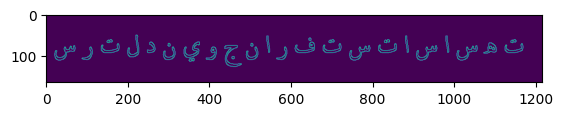

(array([[[1147,   62]],
 
        [[1145,   64]],
 
        [[1144,   64]],
 
        [[1143,   63]],
 
        [[1142,   63]],
 
        [[1141,   64]],
 
        [[1140,   64]],
 
        [[1140,   65]],
 
        [[1139,   66]],
 
        [[1139,   68]],
 
        [[1140,   69]],
 
        [[1143,   69]],
 
        [[1144,   70]],
 
        [[1144,   69]],
 
        [[1145,   68]],
 
        [[1146,   68]],
 
        [[1147,   67]],
 
        [[1148,   68]],
 
        [[1151,   68]],
 
        [[1152,   67]],
 
        [[1152,   64]],
 
        [[1150,   62]]], dtype=int32),
 array([[[1165,   72]],
 
        [[1165,   73]],
 
        [[1164,   74]],
 
        [[1164,   78]],
 
        [[1165,   79]],
 
        [[1165,   83]],
 
        [[1164,   84]],
 
        [[1163,   84]],
 
        [[1162,   85]],
 
        [[1161,   85]],
 
        [[1160,   86]],
 
        [[1157,   86]],
 
        [[1156,   87]],
 
        [[1153,   87]],
 
        [[1152,   88]],
 
        [[1148,   88]],
 

In [1395]:
image = cv2.imread("line4.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="right-to-left")[0]
chars = []

plt.imshow(edged)
plt.show()

cnts




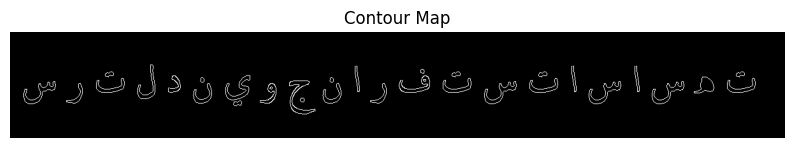

In [1396]:
canvas = np.zeros_like(blurred)

cv2.drawContours(canvas, cnts, -1, (255, 255, 255), thickness=1)  # White contours on the canvas

if len(canvas.shape) == 2:
    canvas = cv2.cvtColor(canvas, cv2.COLOR_GRAY2RGB)

# Display using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(canvas)
plt.title("Contour Map")
plt.axis("off")
plt.show()


In [1397]:
chars = []

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
	# filter out bounding boxes, ensuring they are neither too small
	# nor too large
	if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
		# extract the character and threshold it to make the character
		# appear as *white* (foreground) on a *black* background, then
		# grab the width and height of the thresholded image
		y-=10
		h+=10
		roi = gray[y:y + h, x:x + w]
		thresh = cv2.threshold(roi, 0, 255,
			cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
		(tH, tW) = thresh.shape
		# if the width is greater than the height, resize along the
		# width dimension
		if tW > tH:
			thresh = imutils.resize(thresh, width=32)
		# otherwise, resize along the height
		else:
			thresh = imutils.resize(thresh, height=32)
        # re-grab the image dimensions (now that its been resized)
		# and then determine how much we need to pad the width and
		# height such that our image will be 32x32
		(tH, tW) = thresh.shape
		dX = int(max(0, 32 - tW) / 2.0)
		dY = int(max(0, 32 - tH) / 2.0)
		# pad the image and force 32x32 dimensions
		padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
		padded = cv2.resize(padded, (32, 32))
		# prepare the padded image for classification via our
		# handwriting OCR model
		padded = padded.astype("float32") / 255.0
		padded = np.expand_dims(padded, axis=-1)
		# update our list of characters that will be OCR'd
		chars.append((padded, (x, y, w, h)))
		
chars

[(array([[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         ...,
  
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]], dtype=float32),
  (1125, 62, 45, 33)),
 (array([[[0.       ],
          [0.       ],
          [0.       ],
          ...,
          [0.       ],
          [0.       ],
          [0.       ]],
  
         [[0.       ],
          [0.       ],
          [0.       ],
          ...,
          [0.  

In [1398]:
# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]
chars2 = np.array([c[0] for c in chars], dtype="float32")



In [1399]:
print(chars2.shape)



# OCR the characters using our handwriting recognition model
preds = model.predict(chars2)
#plt.imshow(chars2[2])
#plt.show()

arbarr = []
for i in np.argmax(preds, axis=1):
    arbarr.append(lut[i])

preds[0]

arbarr

(22, 32, 32, 1)
1/1 [==============================] - 0s 44ms/step


['ز',
 'غ',
 'ر',
 'ز',
 'ر',
 'ز',
 'ز',
 'ر',
 'ز',
 'ر',
 'ز',
 'ز',
 'ز',
 'ا',
 'ز',
 'ز',
 'ز',
 'ا',
 'ز',
 'ز',
 'ز',
 'ر']

In [1400]:
# just typed Persian

train_db_persian = tf.keras.utils.image_dataset_from_directory("dataset/set2p/", image_size=(32, 32), batch_size=32, color_mode='grayscale', validation_split=0.2,  # Reserve 20% of data for validation
    subset="training",     # Specify this is the training subset
    seed=42)
val_db_persian = tf.keras.utils.image_dataset_from_directory("dataset/set2p/", image_size=(32, 32), batch_size=32, color_mode='grayscale', validation_split=0.2,  # Reserve 20% of data for validation
    subset="validation",     # Specify this is the training subset
    seed=42)
#train_db_persian = train_db_persian.map(lambda x, y: (x, y + 1))
train_db_persian


Found 3199 files belonging to 32 classes.
Using 2560 files for training.
Found 3199 files belonging to 32 classes.
Using 639 files for validation.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [1052]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Define the augmentation pipeline
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),          # Random horizontal flip
    RandomRotation(0.1),               # Random rotation by ±10%
    RandomZoom(0.2)                    # Random zoom by ±20%
])

# Apply augmentation to the training dataset
train_db_persian = train_db_persian.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

# Prefetch for performance
train_db_persian_aug = train_db_persian.prefetch(tf.data.AUTOTUNE)

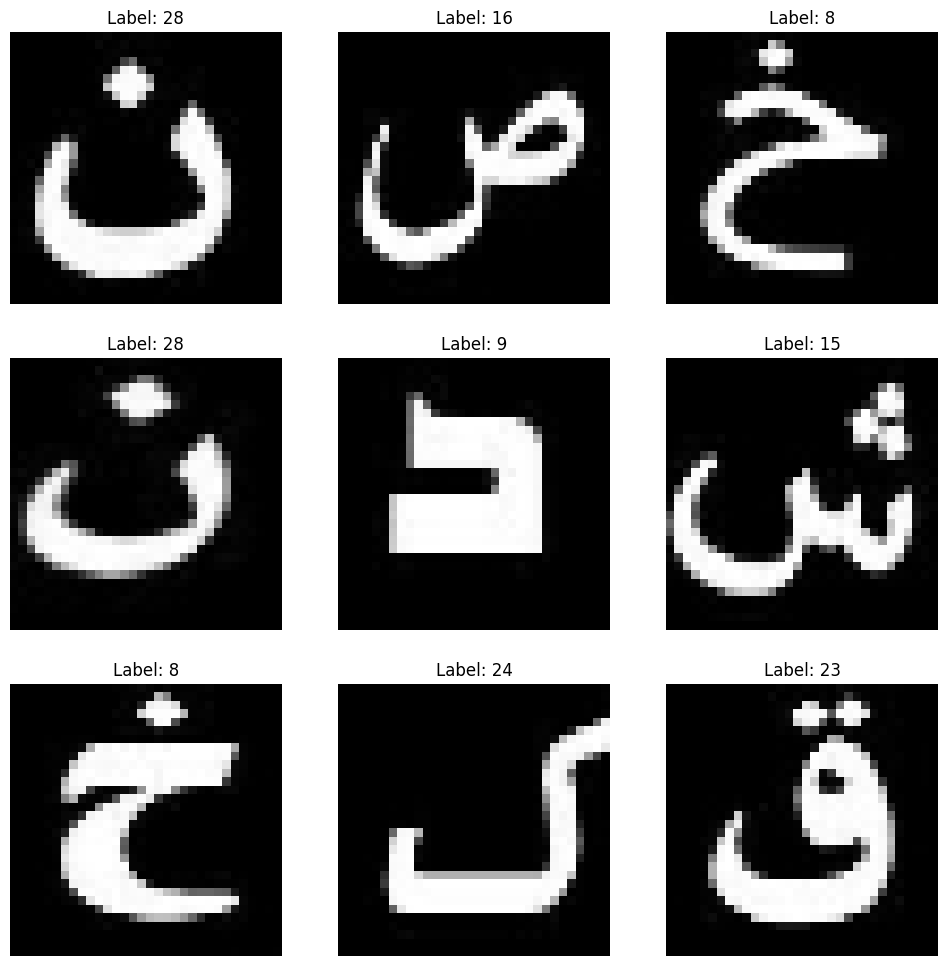

In [1401]:


# Take a batch from the dataset
for images, labels in train_db_persian.take(1):
    images = images.numpy()  # Convert to numpy for easier visualization
    labels = labels.numpy()

    # Plot the images with their corresponding labels
    plt.figure(figsize=(12, 12))
    for i in range(9):  # Display the first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # Squeeze to remove channel dimension if 1D
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()



In [1402]:
print(labels.shape)
val_labels = [3, 30, 14, 0, 14, 0, 3, 14, 3, 22, 11, 0, 28, 5, 29, 31, 28, 9, 26, 3, 11, 14]
val_ds_p = tf.data.Dataset.from_tensor_slices((chars2, val_labels))
print(val_ds_p)
val_ds_p = val_ds_p.shuffle(buffer_size=len(images)).batch(10).prefetch(tf.data.AUTOTUNE)
print(val_ds_p)

(32,)
<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [1408]:
print("chars2 shape:", chars2.shape)  # Should be (22, 32, 32, 1)
print("val_labels shape:", len(val_labels))  # Should be 22

chars2 shape: (22, 32, 32, 1)
val_labels shape: 22


[28  5  0  3 14  9  3  0  3 14]


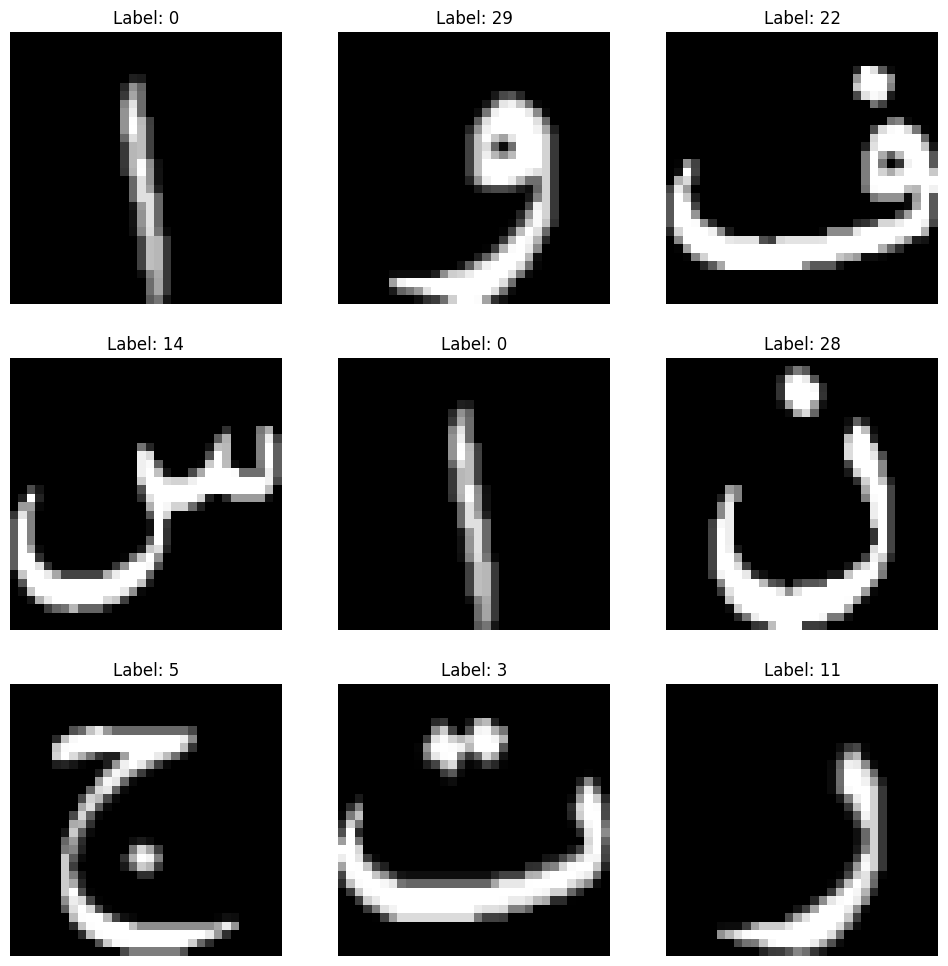

In [1409]:
for images, labels in val_ds_p.take(1):
    images = images.numpy()  # Convert to numpy for easier visualization
    labels = labels.numpy()
    print(labels)


# Take a batch from the dataset
for images, labels in val_ds_p.take(1):
    images = images.numpy()  # Convert to numpy for easier visualization
    labels = labels.numpy()

    # Plot the images with their corresponding labels
    plt.figure(figsize=(12, 12))
    for i in range(9):  # Display the first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # Squeeze to remove channel dimension if 1D
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

In [1403]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

# Apply normalization and prepare the dataset
train_db_persian = train_db_persian.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
train_db_persian = train_db_persian.prefetch(tf.data.AUTOTUNE)

for images, labels in val_ds_p.take(1):
    print("Image shape:", images.shape)  # Should be (batch_size, 32, 32, 1)
    print("Label shape:", labels.shape)  # Should be (batch_size,)
    print("Image range:", images.numpy().min(), images.numpy().max())  # Should be [0, 1]

for images, labels in train_db_persian.take(1):
    print("Image shape:", images.shape)  # Should be (batch_size, 32, 32, 1)
    print("Label shape:", labels.shape)  # Should be (batch_size,)
    print("Image range:", images.numpy().min(), images.numpy().max())  # Should be [0, 1]

Image shape: (10, 32, 32, 1)
Label shape: (10,)
Image range: 0.0 1.0
Image shape: (32, 32, 32, 1)
Label shape: (32,)
Image range: 0.0 1.0


In [1404]:
from tensorflow.keras.layers import Rescaling, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD

class_weights = {i: 1.0 for i in range(32)}
class_weights[0] = 0


#train new model

# model2 = Sequential([
#     Input(shape=(32, 32, 1)),
#     Rescaling(1./255),
#     #Conv2D(filters=6, kernel_size=(5,5),  activation='relu', padding='same'),
#     #AveragePooling2D(pool_size=(2, 2), strides=2),
#     Conv2D(filters=16, kernel_size=(5,5),  activation='relu',  padding='same'),
#     AveragePooling2D(pool_size=(2, 2), strides=2),
#     Conv2D(filters=16, kernel_size=(5,5),  activation='relu',  padding='same'),
#     AveragePooling2D(pool_size=(2, 2), strides=2),
#     Flatten(),
#     Dense(120, activation='sigmoid'),
#     Dense(84, activation='sigmoid'),
#     Dense(32, activation='softmax')
# ])

model2 = Sequential([
    Input(shape=(32, 32, 1)),
    Rescaling(1./255),
    Conv2D(filters=32, kernel_size=(9,9),  activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=32, kernel_size=(9,9),  activation='relu',  padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=32, kernel_size=(9,9),  activation='relu',  padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(120, activation='sigmoid'),
    Dropout(0.7),
    Dense(84, activation='sigmoid'),
    Dense(32, activation='softmax')
])

model2.compile(optimizer=Adam(lr=0.00001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history2 = model2.fit(train_db_persian, epochs=120, validation_data=val_ds_p,
    callbacks=callbacks)


Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_103 (Rescaling)   (None, 32, 32, 1)         0         
                                                                 
 conv2d_395 (Conv2D)         (None, 32, 32, 32)        2624      
                                                                 
 max_pooling2d_118 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_396 (Conv2D)         (None, 16, 16, 32)        82976     
                                                                 
 max_pooling2d_119 (MaxPooli  (None, 8, 8, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_397 (Conv2D)         (None, 8, 8, 32)       

KeyboardInterrupt: 

In [1410]:
# Load dataset

model2 = None
model2 = tf.keras.models.load_model("disconnected_letters")

In [1411]:
print(labels.shape)
val_labels = [3, 30, 14, 0, 14, 0, 3, 14, 3, 22, 11, 0, 28, 5, 29, 31, 28, 9, 26, 3, 11, 14]
val_ds_p = tf.data.Dataset.from_tensor_slices((chars2, val_labels))
print(val_ds_p)
val_ds_p = val_ds_p.shuffle(buffer_size=len(images)).batch(10).prefetch(tf.data.AUTOTUNE)
print(val_ds_p)

(10,)
<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [1412]:
print(labels.shape)
val_labels = [3, 30, 14, 0, 14, 0, 3, 14, 3, 22, 11, 0, 28, 5, 29, 31, 28, 9, 26, 3, 11, 14]
val_ds_p = tf.data.Dataset.from_tensor_slices((chars2, val_labels))
print(val_ds_p)
val_ds_p = val_ds_p.shuffle(buffer_size=len(images)).batch(10).prefetch(tf.data.AUTOTUNE)
print(val_ds_p)

(10,)
<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [1413]:
lut2 = ('ا', 'ب','پ','ت', 'ث', 'ج', 'چ', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز','ژ', 'س', 'ش', 'ص', 'ض','ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك','گ', 'ل', 'م', 'ن', 'و','ه', 'ي')

# OCR the characters using our handwriting recognition model
preds = model2.predict(chars2)
#plt.imshow(chars2[1])
#plt.show()
print(preds)

arbarr = ""
for i in np.argmax(preds, axis=1):
    print(i)
    arbarr += (lut2[i]) + " "

preds[0]

arbarr

1/1 [==============================] - 0s 42ms/step
[[1.37542543e-07 1.99115326e-04 2.64075652e-06 8.18206429e-01
  1.57525599e-01 4.42147098e-07 4.96363506e-10 2.13549592e-05
  5.28231394e-05 1.86626016e-06 1.40710043e-07 1.50433399e-09
  2.28054532e-07 1.60161946e-07 2.60649582e-08 3.93295086e-05
  4.53359988e-10 3.46515243e-08 4.54499877e-06 1.07534281e-04
  4.25120779e-05 4.33894712e-07 4.93004845e-05 5.25255018e-07
  7.69814415e-06 2.03826955e-09 3.81927464e-07 9.15889814e-07
  2.37217043e-02 1.59090696e-09 5.63921458e-06 8.59935790e-06]
 [3.51637624e-07 2.60491664e-08 6.54686517e-07 1.22174279e-05
  9.50788399e-06 1.46243474e-04 5.73694197e-05 9.01833914e-08
  1.29476837e-06 9.28957108e-03 1.13235603e-06 1.13651049e-06
  2.02881651e-07 6.56264310e-05 5.71748870e-08 2.39835153e-05
  1.53083907e-10 6.13229423e-09 3.08063989e-07 1.29531050e-04
  5.62043345e-09 3.45508369e-08 8.48780779e-09 3.67409666e-04
  1.50168461e-07 2.25829353e-07 2.76506353e-06 6.07683091e-07
  2.84438428e-08 

'ت ه س ا س ا ت س ت ف ژ ا ن ج و ك ن د ل ت ژ س '

In [1414]:
model2.evaluate(val_ds_p)

# it seems to evaluate arabic r as persian zh -- same character but with different 

3/3 [==============================] - 0s 4ms/step - loss: 1.1078 - accuracy: 0.8636


[1.1078180074691772, 0.8636363744735718]

In [ ]:
model2.save('disconnected_letters2')

# Start on joined letters

27


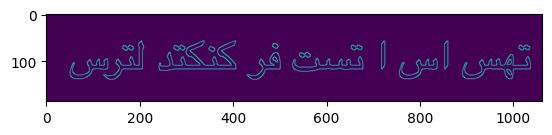

In [1415]:
jimage = cv2.imread("line5.jpg")
jgray = cv2.cvtColor(jimage, cv2.COLOR_BGR2GRAY)
jblurred = cv2.GaussianBlur(jgray, (5, 5), 0)

jedged = cv2.Canny(jblurred, 30, 150)

jcnts = cv2.findContours(jedged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
jcnts = imutils.grab_contours(jcnts)
jcnts = sort_contours(jcnts, method="right-to-left")[0]
jchars = []
print(len(jcnts))

plt.imshow(jedged)
plt.show()

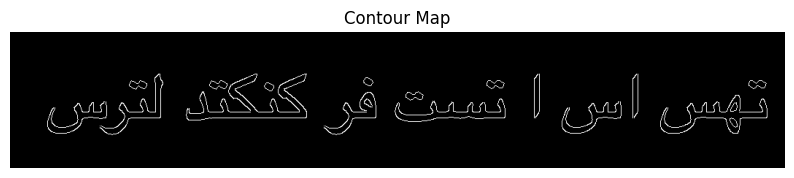

In [1416]:
jcanvas = np.zeros_like(jblurred)

cv2.drawContours(jcanvas, jcnts, -1, (255, 255, 255), thickness=1)  # White contours on the canvas

if len(jcanvas.shape) == 2:
    jcanvas = cv2.cvtColor(jcanvas, cv2.COLOR_GRAY2RGB)

# Display using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(jcanvas)
plt.title("Contour Map")
plt.axis("off")
plt.show()

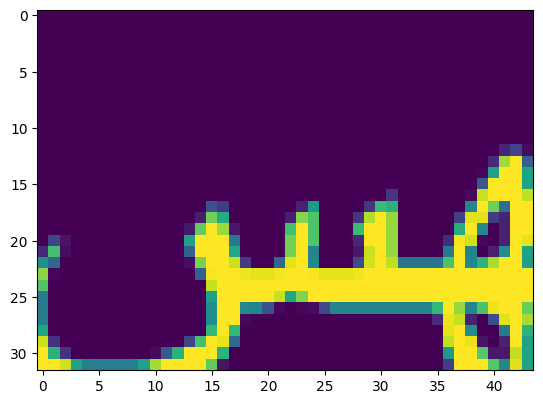

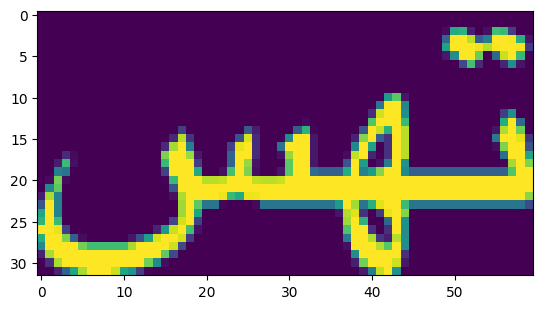

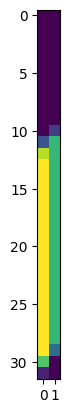

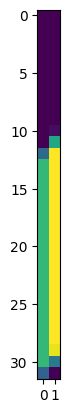

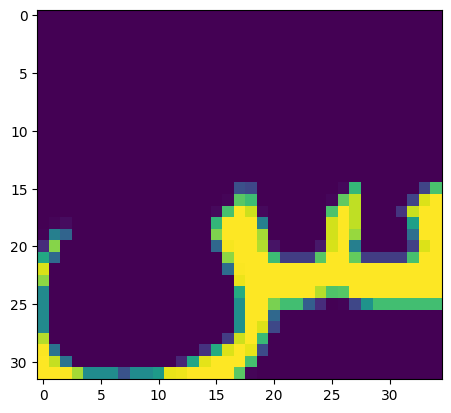

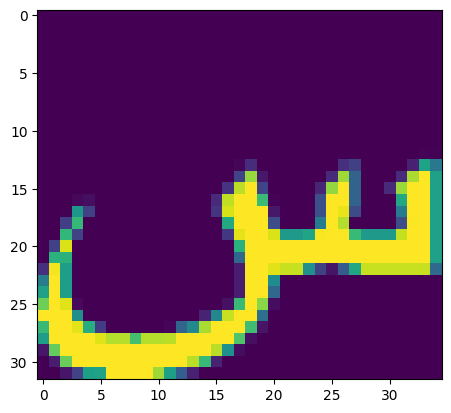

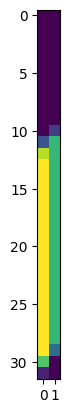

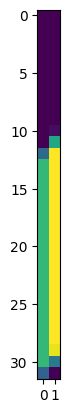

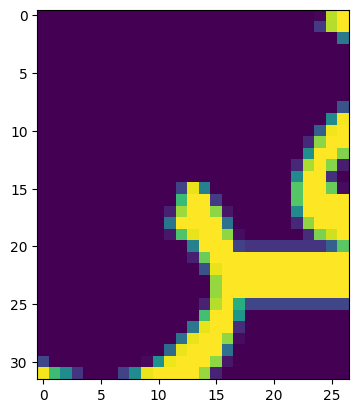

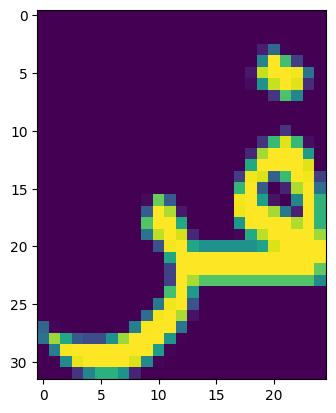

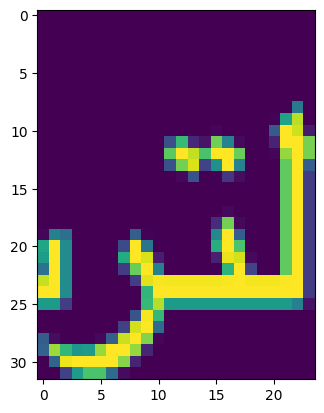

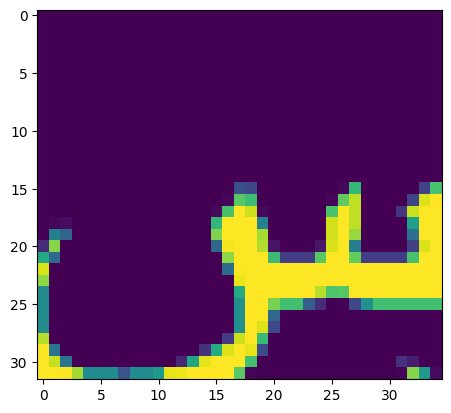

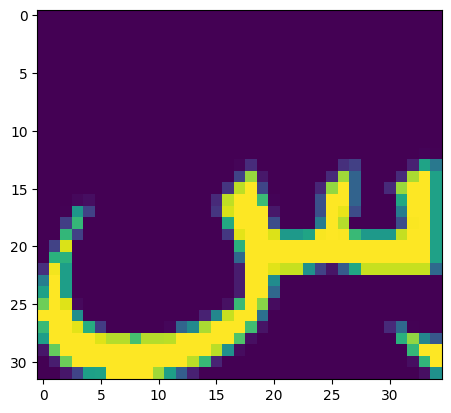

In [1417]:
jchars = []

# loop over the contours
for c in jcnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
	
	# filter out bounding boxes, ensuring they are neither too small
	# nor too large
	if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
	#if True:
		# extract the character and threshold it to make the character
		# appear as *white* (foreground) on a *black* background, then
		# grab the width and height of the thresholded image
		y-=30
		h+=30
		roi = jgray[y:y + h, x:x + w]
		thresh = cv2.threshold(roi, 0, 255,
			cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
		(tH, tW) = thresh.shape

		# if the width is greater than the height, resize along the
		# width dimension
		# if tW > tH:
		# 	thresh = imutils.resize(thresh, width=32)
		# # otherwise, resize along the height
		# else:
		
		thresh = imutils.resize(thresh, height=32)

		
        # re-grab the image dimensions (now that its been resized)
		# and then determine how much we need to pad the width and
		# height such that our image will be 32x32
		(tH, tW) = thresh.shape
		dX = int(max(0, 32 - tW) / 2.0)
		dY = int(max(0, 32 - tH) / 2.0)
		
		# pad the image and force 32x32 dimensions
		padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
		padded = cv2.resize(padded, (64, 64))

		plt.imshow(thresh)
		plt.show()
		# prepare the padded image for classification via our
		# handwriting OCR model
		padded = padded.astype("float32") / 255.0
		padded = np.expand_dims(padded, axis=-1)
		# update our list of characters that will be OCR'd
		jchars.append((padded, (x, y, w, h)))

# extract the bounding box locations and padded characters
jboxes = [b[1] for b in jchars]
jchunks = np.array([c[0] for c in jchars], dtype="float32")




13
[[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[1.        ]
   [0.85882354]
   [0.64705884]
   ...
   [0.75686276]
   [0.7607843 ]
   [0.5803922 ]]

  [[1.        ]
   [0.9529412 ]
   [0.87058824]
   ...
   [0.8156863 ]
   [0.77254903]
   [0.5803922 ]]

  [[1.        ]
   [1.        ]
   [0.9843137 ]
   ...
   [0.84705883]
   [0.7764706 ]
   [0.5803922 ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.09411765]
   [

IndexError: index 13 is out of bounds for axis 0 with size 13

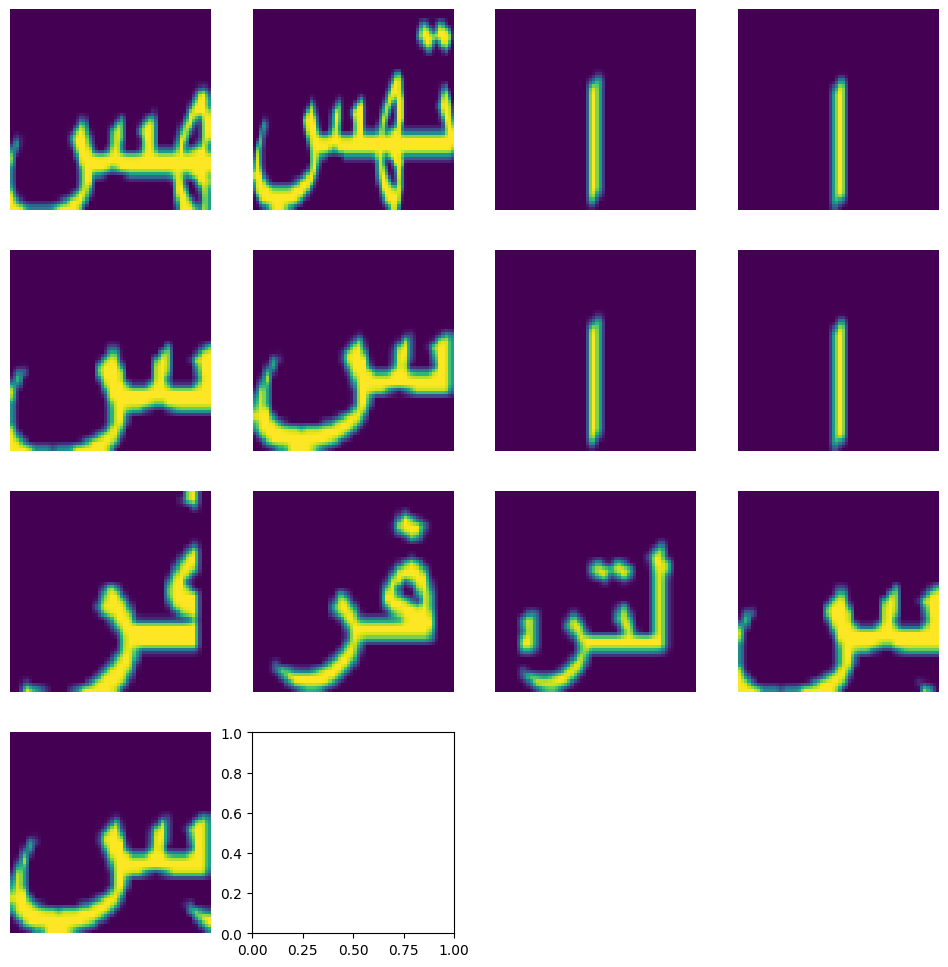

In [1418]:
print(len(jchunks))
print(jchunks)
# Plot the images with their corresponding labels
plt.figure(figsize=(12, 12))
for i in range(16):  # Display the first 9 images
	plt.subplot(4, 4, i + 1)
	plt.imshow(jchunks[i])  # Squeeze to remove channel dimension if 1D
	plt.axis('off')
plt.show()

In [1419]:
rects = [cv2.boundingRect(i) for i in jcnts]
print("test")

min_y = min(rects, key=lambda t: t[1])[1]
min_x = min(rects, key=lambda t: t[0])[0]
max_h = max(rects, key=lambda t: t[3])[3]
max_w = max(rects, key=lambda t: t[2])[2]
max_x = max(rects, key=lambda t: t[0])[0]
max_y = max(rects, key=lambda t: t[1])[1]

line_processed = cv2.threshold(jgray[min_y:min_y + max_h, min_x:max_x + max_w], 0, 255,
			cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

final_line_bounds = cv2.boundingRect(line_processed)
print(final_line_bounds)

rlStartPoint = final_line_bounds[2]




# box = line_processed[final_line_bounds[1]:final_line_bounds[1] + final_line_bounds[3], rlStartPoint - iterWidth: rlStartPoint]
# (tH, tW) = box.shape
# dX = int(max(0, 32 - tW) / 2.0)
# dY = int(max(0, 32 - tH) / 2.0)
# box_pad = cv2.copyMakeBorder(box, top=dY, bottom=dY,
# 	left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
# 	value=(0, 0, 0))
# box_pad = cv2.resize(box_pad, (32, 32))

# plt.imshow(box_pad)
# plt.show()

# box_pad = np.expand_dims(box_pad, axis=0)  # Add batch dimension -> [1, 32, 32]
# box_pad = np.expand_dims(box_pad, axis=-1)  # Add channel dimension -> [1, 32, 32, 1]

# print(box_pad.shape)
# print(chars2.shape)

# lut2[np.argmax(model2.predict(box_pad)[0])]


        
        

    


test
(0, 0, 987, 83)


At position 987
78540


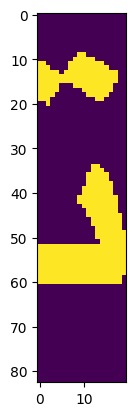

1/1 [==============================] - 0s 42ms/step
0.95903957
10
ذ
61455


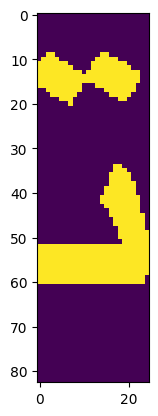

1/1 [==============================] - 0s 12ms/step
0.96295863
3
ت
MAX0.96295863
ت
At position 962
97665


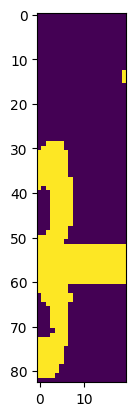

1/1 [==============================] - 0s 11ms/step
0.9758995
18
ط
MAX0.9758995
ط
At position 942
63495


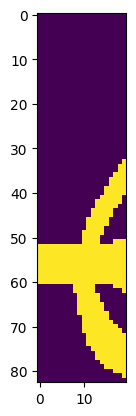

1/1 [==============================] - 0s 12ms/step
0.57262516
22
ف
49470


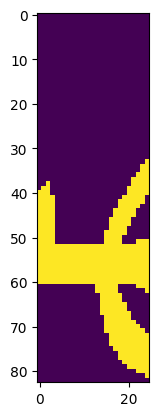

1/1 [==============================] - 0s 17ms/step
0.97917306
22
ف
MAX0.97917306
ف
At position 917
44625


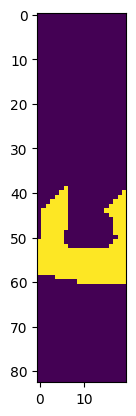

1/1 [==============================] - 0s 12ms/step
0.6196975
3
ت
44115


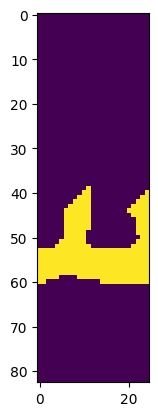

1/1 [==============================] - 0s 11ms/step
0.8035393
4
ث
40800


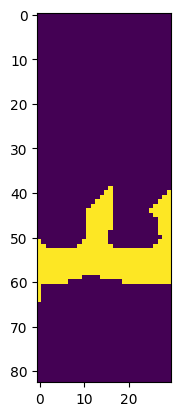

1/1 [==============================] - 0s 11ms/step
0.4611719
22
ف
56865


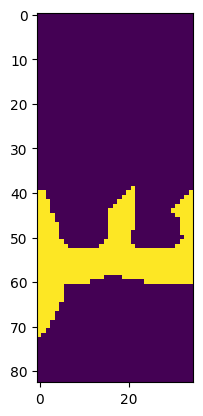

1/1 [==============================] - 0s 11ms/step
0.93775463
22
ف
69105


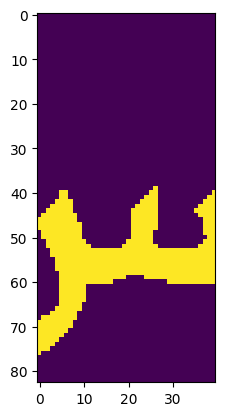

1/1 [==============================] - 0s 16ms/step
0.9359335
22
ف
67830


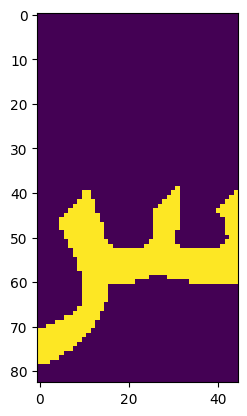

1/1 [==============================] - 0s 12ms/step
0.8152737
4
ث
43350


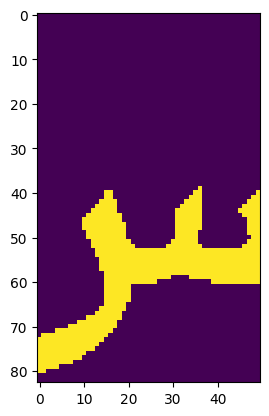

1/1 [==============================] - 0s 12ms/step
0.76491743
4
ث
32130


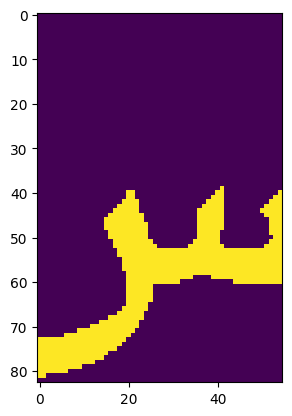

1/1 [==============================] - 0s 13ms/step
0.69897646
18
ط
32895


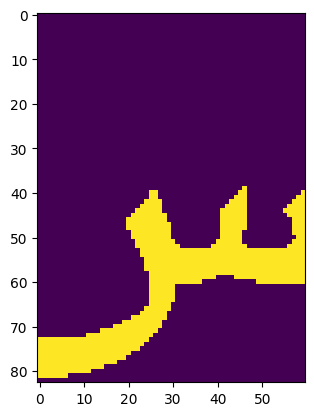

1/1 [==============================] - 0s 12ms/step
0.9802675
18
ط
MAX0.9802675
ط
At position 857
46155


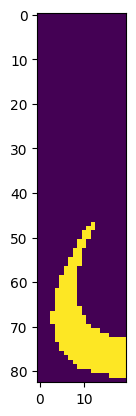

1/1 [==============================] - 0s 12ms/step
0.44763303
12
ز
30855


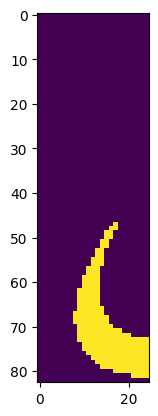

1/1 [==============================] - 0s 13ms/step
0.6317828
12
ز
3825


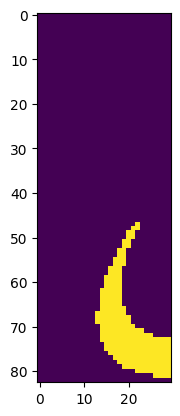

1/1 [==============================] - 0s 11ms/step
0.70913047
10
ذ
0
At position 827
27285


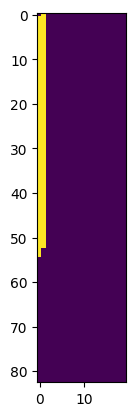

1/1 [==============================] - 0s 11ms/step
0.4707713
2
پ
82620


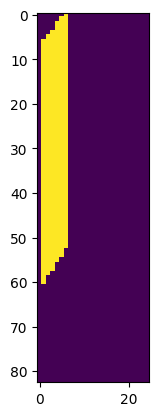

1/1 [==============================] - 0s 44ms/step
0.7174207
21
غ
82620


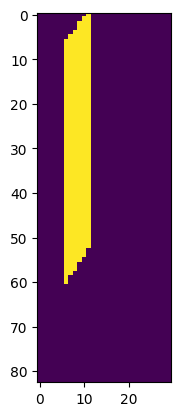

1/1 [==============================] - 0s 12ms/step
0.59966856
21
غ
55335


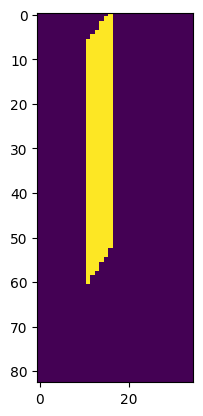

1/1 [==============================] - 0s 11ms/step
0.40083042
21
غ
0
At position 802
22185


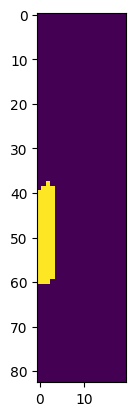

1/1 [==============================] - 0s 12ms/step
0.3440408
12
ز
42585


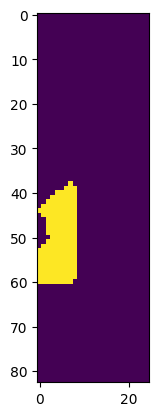

1/1 [==============================] - 0s 13ms/step
0.41251144
12
ز
52785


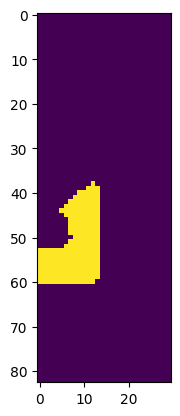

1/1 [==============================] - 0s 12ms/step
0.44682887
12
ز
46155


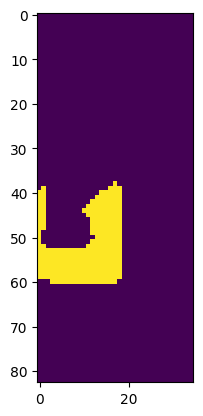

1/1 [==============================] - 0s 12ms/step
0.93947214
17
ض
44625


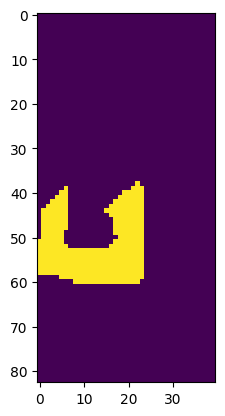

1/1 [==============================] - 0s 12ms/step
0.45653367
22
ف
44115


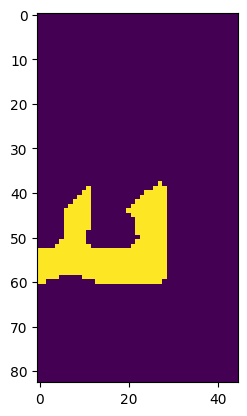

1/1 [==============================] - 0s 13ms/step
0.91854334
22
ف
40545


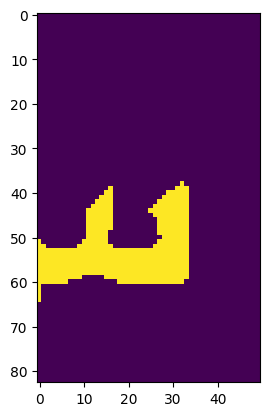

1/1 [==============================] - 0s 59ms/step
0.61086375
4
ث
56865


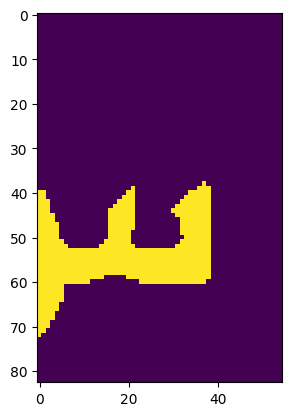

1/1 [==============================] - 0s 13ms/step
0.9832756
22
ف
MAX0.9832756
ف
At position 747
31875


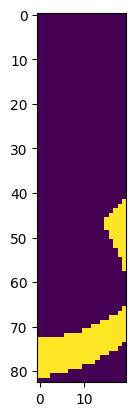

1/1 [==============================] - 0s 15ms/step
0.99744165
22
ف
MAX0.99744165
ف
At position 727
53550


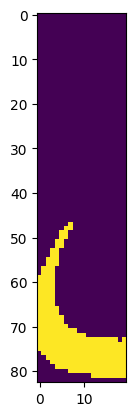

1/1 [==============================] - 0s 12ms/step
0.65404
4
ث
46665


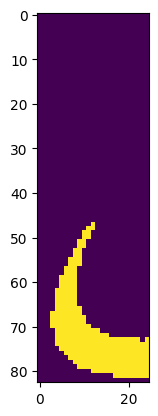

1/1 [==============================] - 0s 13ms/step
0.41402718
21
غ
31365


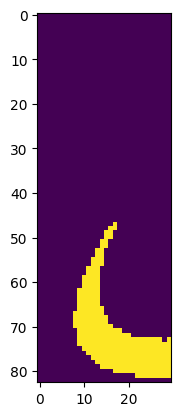

1/1 [==============================] - 0s 13ms/step
0.67482173
21
غ
4335


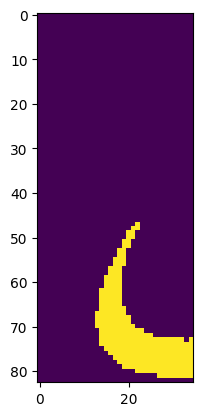

1/1 [==============================] - 0s 13ms/step
0.9120309
12
ز
0
At position 692
27285


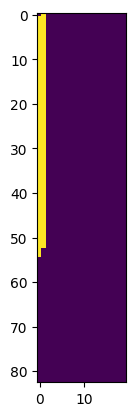

1/1 [==============================] - 0s 12ms/step
0.4707713
2
پ
82620


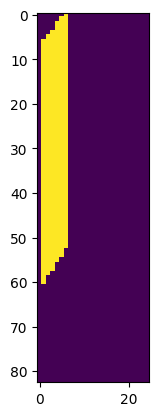

1/1 [==============================] - 0s 51ms/step
0.7174207
21
غ
82620


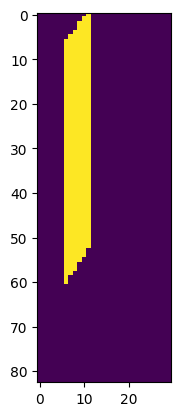

1/1 [==============================] - 0s 16ms/step
0.59966856
21
غ
55335


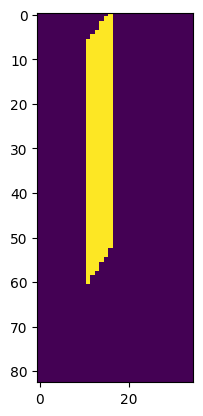

1/1 [==============================] - 0s 15ms/step
0.40083042
21
غ
0
At position 667
0
At position 652
0
At position 637
71910


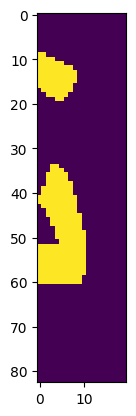

1/1 [==============================] - 0s 12ms/step
0.6792876
10
ذ
86445


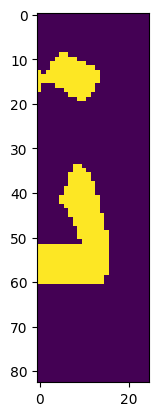

1/1 [==============================] - 0s 13ms/step
0.9647949
10
ذ
MAX0.9647949
ذ
At position 612
65535


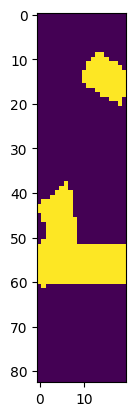

1/1 [==============================] - 0s 12ms/step
0.87587583
3
ت
56100


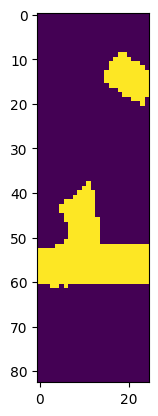

1/1 [==============================] - 0s 12ms/step
0.5276234
3
ت
46665


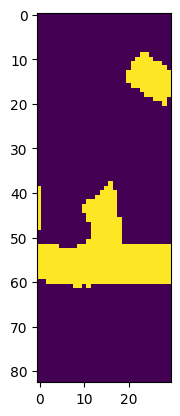

1/1 [==============================] - 0s 12ms/step
0.60555094
22
ف
46665


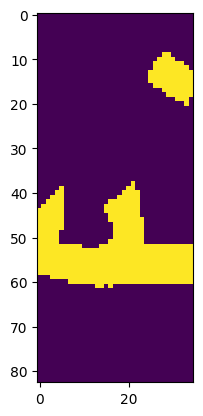

1/1 [==============================] - 0s 13ms/step
0.94540554
15
ش
45645


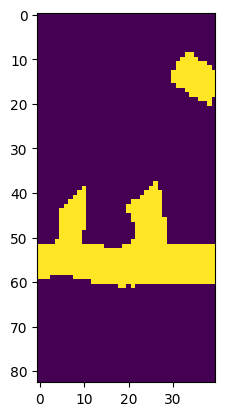

1/1 [==============================] - 0s 12ms/step
0.8195879
22
ف
43350


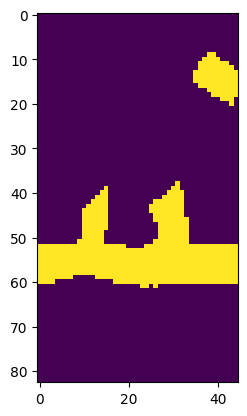

1/1 [==============================] - 0s 13ms/step
0.4015682
3
ت
32640


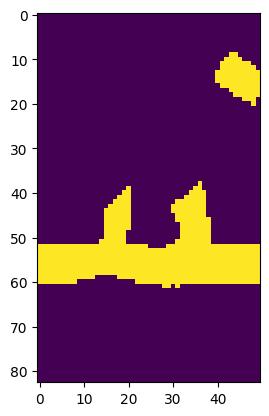

1/1 [==============================] - 0s 13ms/step
0.59768397
22
ف
33660


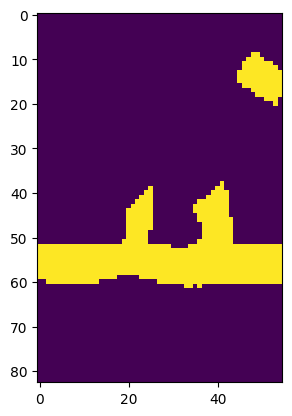

1/1 [==============================] - 0s 12ms/step
0.96139073
22
ف
MAX0.96139073
ف
At position 557
36720


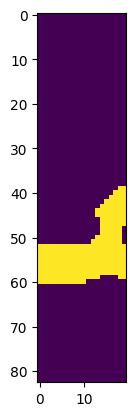

1/1 [==============================] - 0s 12ms/step
0.91008043
22
ف
38250


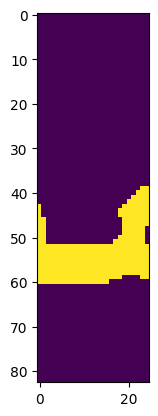

1/1 [==============================] - 0s 13ms/step
0.9858144
22
ف
MAX0.9858144
ف
At position 532
37740


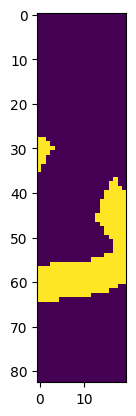

1/1 [==============================] - 0s 16ms/step
0.8048554
22
ف
47430


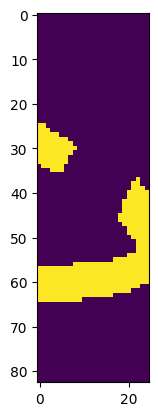

1/1 [==============================] - 0s 12ms/step
0.8950129
3
ت
54825


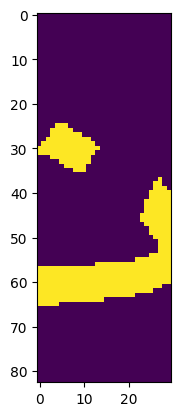

1/1 [==============================] - 0s 13ms/step
0.91473126
3
ت
60945


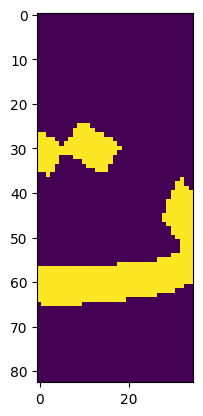

1/1 [==============================] - 0s 14ms/step
0.95805645
3
ت
59670


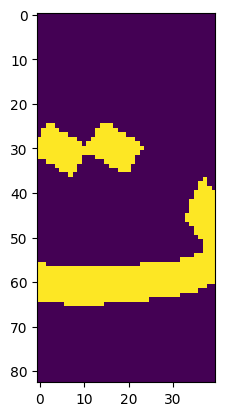

1/1 [==============================] - 0s 12ms/step
0.9697183
3
ت
MAX0.9697183
ت
At position 492
32895


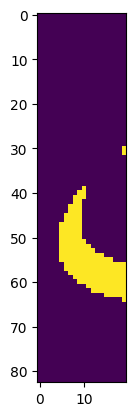

1/1 [==============================] - 0s 13ms/step
0.58184254
18
ط
19890


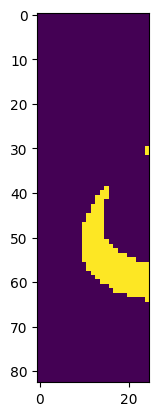

1/1 [==============================] - 0s 60ms/step
0.88563424
10
ذ
0
At position 467
21675


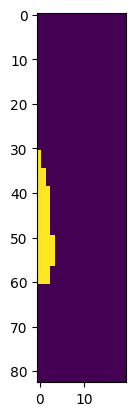

1/1 [==============================] - 0s 20ms/step
0.45067826
28
ن
67830


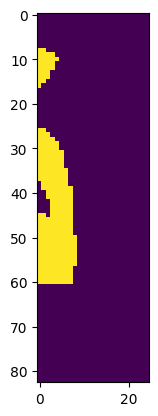

1/1 [==============================] - 0s 13ms/step
0.5628538
1
ب
114750


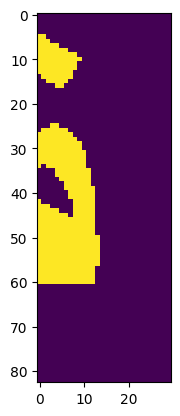

1/1 [==============================] - 0s 12ms/step
0.7568752
2
پ
133620


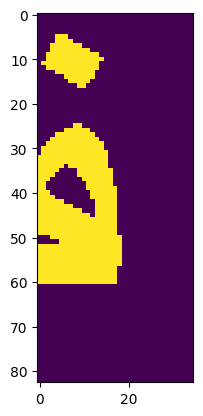

1/1 [==============================] - 0s 11ms/step
0.5672366
12
ز
110415


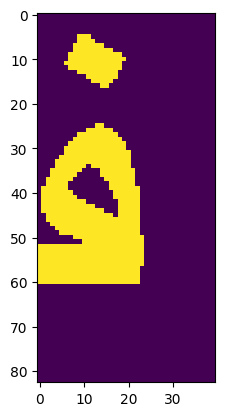

1/1 [==============================] - 0s 13ms/step
0.9039298
10
ذ
74970


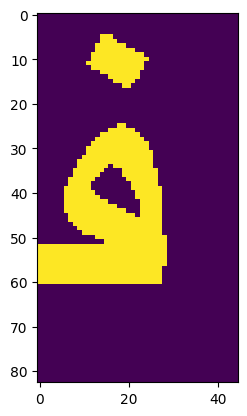

1/1 [==============================] - 0s 12ms/step
0.9950303
10
ذ
MAX0.9950303
ذ
At position 422
73950


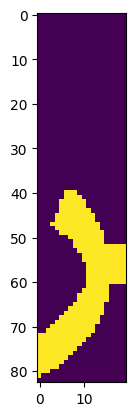

1/1 [==============================] - 0s 12ms/step
0.7808175
10
ذ
54060


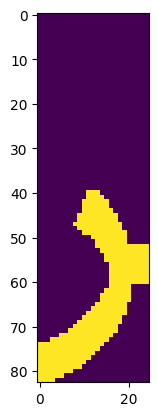

1/1 [==============================] - 0s 15ms/step
0.7721697
10
ذ
35955


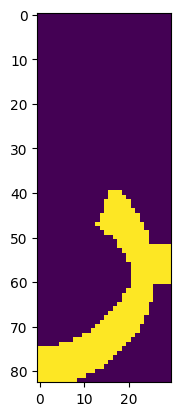

1/1 [==============================] - 0s 13ms/step
0.47802803
10
ذ
30600


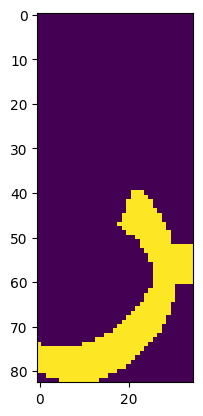

1/1 [==============================] - 0s 13ms/step
0.57335144
22
ف
24480


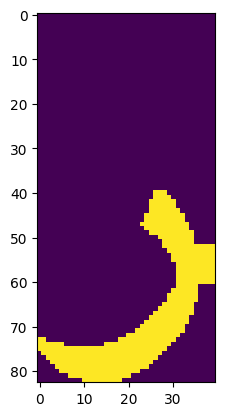

1/1 [==============================] - 0s 14ms/step
0.98120004
22
ف
MAX0.98120004
ف
At position 382
0
At position 367
48450


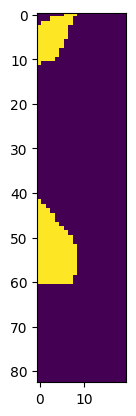

1/1 [==============================] - 0s 12ms/step
0.8161148
18
ط
84150


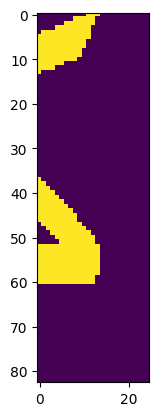

1/1 [==============================] - 0s 14ms/step
0.44434395
2
پ
104040


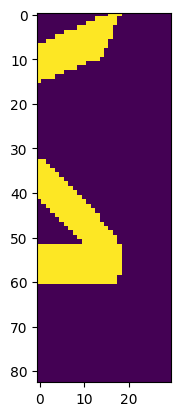

1/1 [==============================] - 0s 12ms/step
0.9654538
20
ع
MAX0.9654538
ع
At position 337
99195


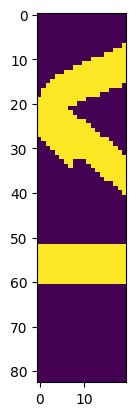

1/1 [==============================] - 0s 14ms/step
0.95499206
29
و
86955


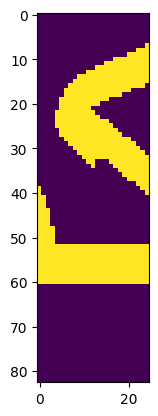

1/1 [==============================] - 0s 14ms/step
0.7849454
31
ي
85935


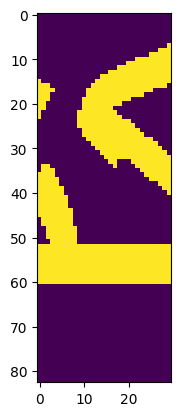

1/1 [==============================] - 0s 13ms/step
0.52820754
3
ت
82365


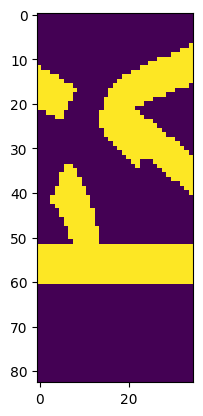

1/1 [==============================] - 0s 13ms/step
0.4138761
1
ب
79050


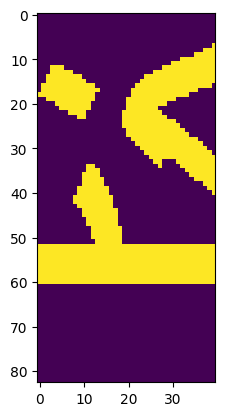

1/1 [==============================] - 0s 13ms/step
0.87836426
7
ح
55335


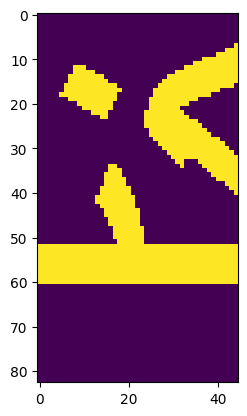

1/1 [==============================] - 0s 13ms/step
0.30055112
7
ح
42075


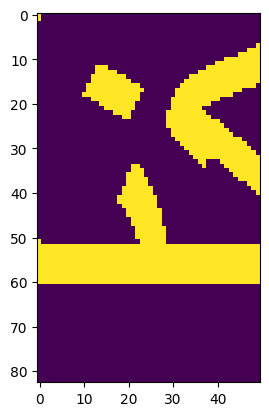

1/1 [==============================] - 0s 12ms/step
0.4057007
28
ن
50235


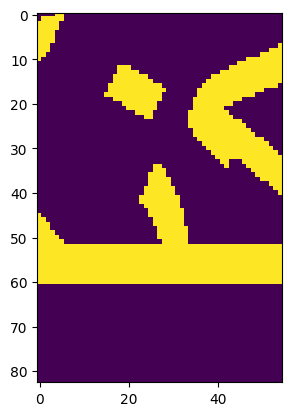

1/1 [==============================] - 0s 12ms/step
0.9891922
28
ن
MAX0.9891922
ن
At position 282
104805


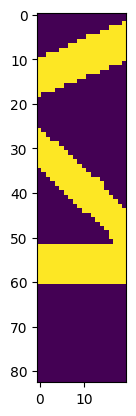

1/1 [==============================] - 0s 12ms/step
0.4896953
6
چ
104040


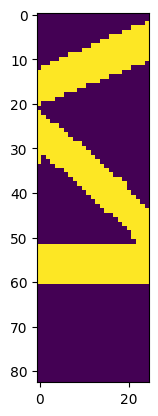

1/1 [==============================] - 0s 11ms/step
0.982803
29
و
MAX0.982803
و
At position 257
91545


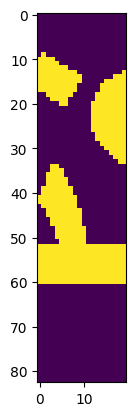

1/1 [==============================] - 0s 13ms/step
0.6036861
5
ج
87720


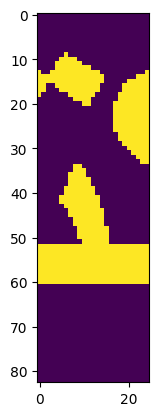

1/1 [==============================] - 0s 11ms/step
0.5377312
13
ژ
74715


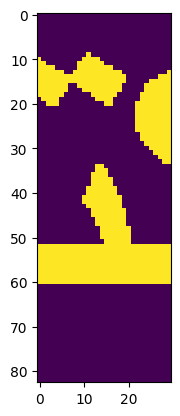

1/1 [==============================] - 0s 11ms/step
0.22038767
28
ن
58140


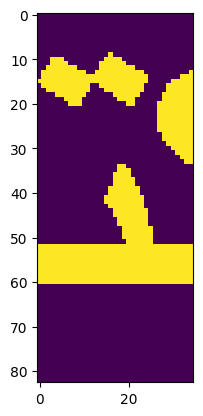

1/1 [==============================] - 0s 12ms/step
0.7378857
28
ن
61455


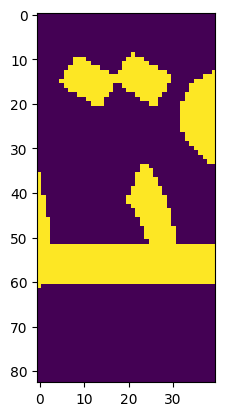

1/1 [==============================] - 0s 11ms/step
0.96707916
28
ن
MAX0.96707916
ن
At position 217
40290


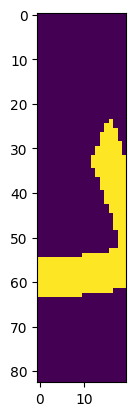

1/1 [==============================] - 0s 43ms/step
0.68072665
23
ق
37995


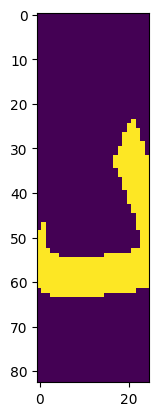

1/1 [==============================] - 0s 63ms/step
0.9953929
22
ف
MAX0.9953929
ف
At position 192
0
At position 177
2295


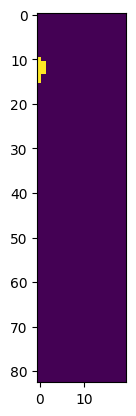

1/1 [==============================] - 0s 11ms/step
0.9676253
2
پ
MAX0.9676253
پ
At position 157
76245


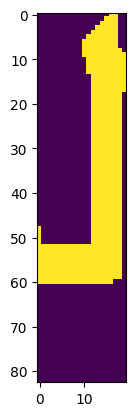

1/1 [==============================] - 0s 11ms/step
0.80071926
23
ق
59670


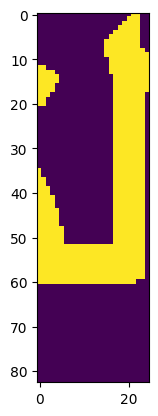

1/1 [==============================] - 0s 13ms/step
0.8203159
26
ل
83385


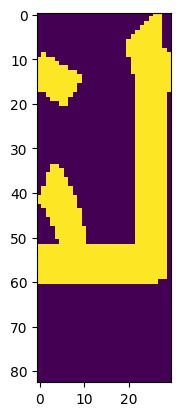

1/1 [==============================] - 0s 12ms/step
0.43973693
1
ب
87465


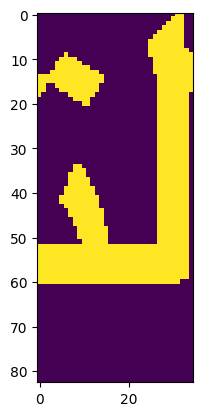

1/1 [==============================] - 0s 12ms/step
0.25043333
8
خ
74460


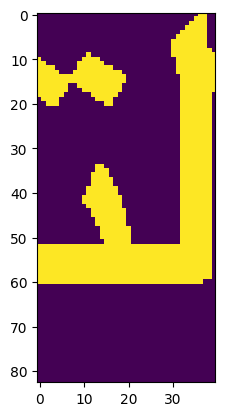

1/1 [==============================] - 0s 11ms/step
0.67248017
19
ظ
57885


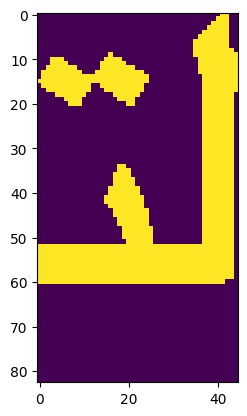

1/1 [==============================] - 0s 11ms/step
0.5325137
19
ظ
64515


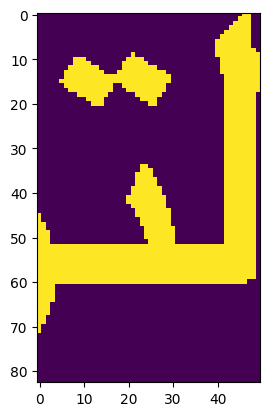

1/1 [==============================] - 0s 12ms/step
0.5693766
3
ت
73950


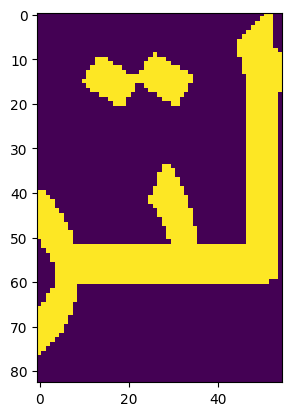

1/1 [==============================] - 0s 13ms/step
0.53461426
15
ش
74715


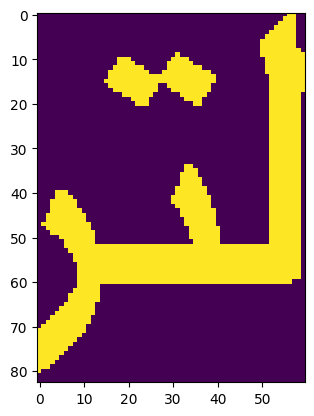

1/1 [==============================] - 0s 14ms/step
0.5373328
28
ن
63495


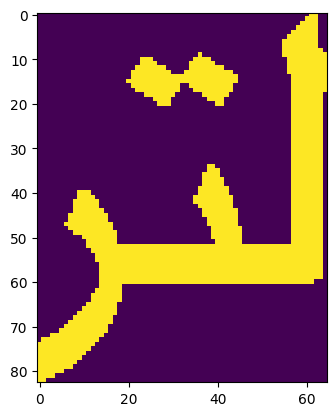

1/1 [==============================] - 0s 12ms/step
0.9198726
3
ت
42075


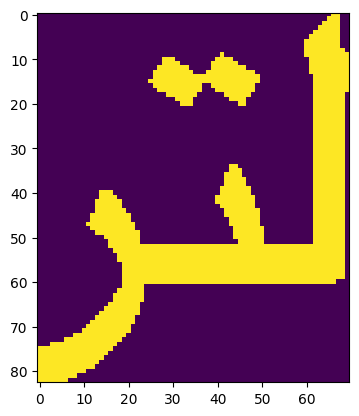

1/1 [==============================] - 0s 12ms/step
0.9398419
3
ت
At position 87
63240


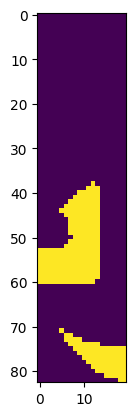

1/1 [==============================] - 0s 14ms/step
0.48490533
10
ذ
49470


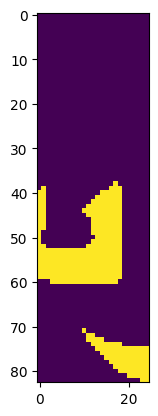

1/1 [==============================] - 0s 15ms/step
0.99872726
22
ف
MAX0.99872726
ف
At position 62
56865


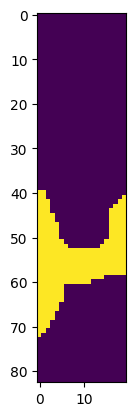

1/1 [==============================] - 0s 12ms/step
0.6343204
3
ت
69105


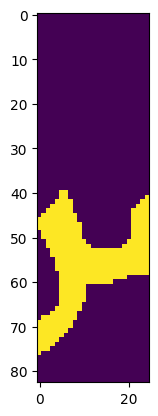

1/1 [==============================] - 0s 12ms/step
0.5104694
4
ث
67575


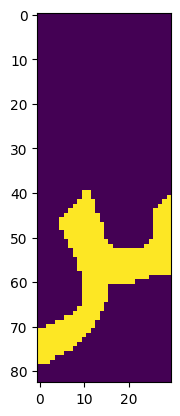

1/1 [==============================] - 0s 12ms/step
0.89677304
18
ط
42840


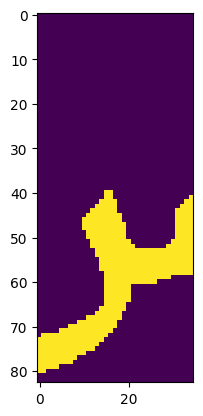

1/1 [==============================] - 0s 13ms/step
0.9793841
18
ط
MAX0.9793841
ط
At position 27
37740


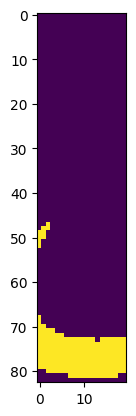

1/1 [==============================] - 0s 13ms/step
0.78989726
21
غ
53550


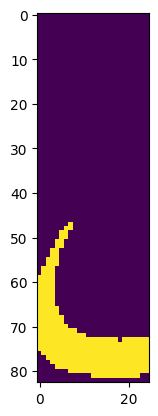

1/1 [==============================] - 0s 22ms/step
0.6154568
4
ث
53295


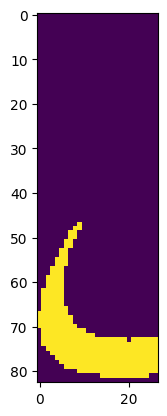

1/1 [==============================] - 0s 13ms/step
0.7332145
4
ث
53295


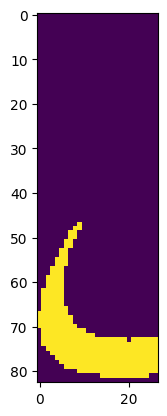

1/1 [==============================] - 0s 11ms/step
0.7332145
4
ث
53295


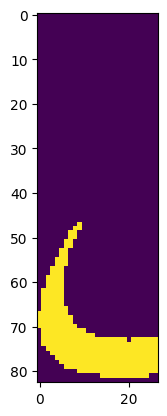

1/1 [==============================] - 0s 13ms/step
0.7332145
4
ث
53295


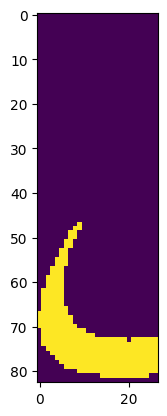

1/1 [==============================] - 0s 12ms/step
0.7332145
4
ث
53295


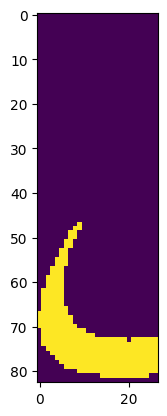

1/1 [==============================] - 0s 14ms/step
0.7332145
4
ث
53295


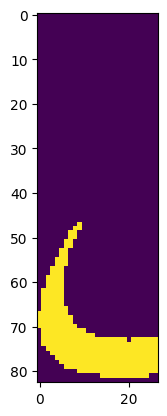

1/1 [==============================] - 0s 14ms/step
0.7332145
4
ث
53295


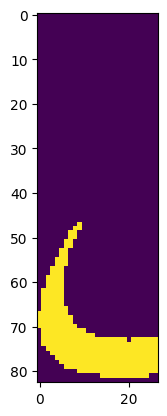

1/1 [==============================] - 0s 12ms/step
0.7332145
4
ث
53295


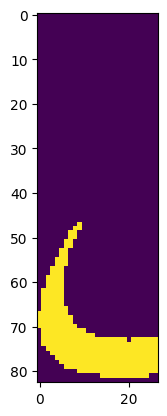

1/1 [==============================] - 0s 12ms/step
0.7332145
4
ث
53295


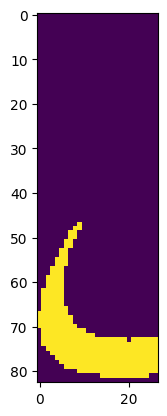

1/1 [==============================] - 0s 12ms/step
0.7332145
4
ث
تطفطذغففزغذففتذذفعنونفپتفطغ


In [1420]:
pred_thresh = 9.6e-1

iterWidth = 15
startPos = rlStartPoint

output = ""

while (startPos > iterWidth):
	preds = []
	print(f'At position {startPos}')
	for i in range(5, 60, 5):
		box = line_processed[final_line_bounds[1]:final_line_bounds[1] + final_line_bounds[3], max(startPos - (iterWidth + i), 0): startPos]
		(tH, tW) = box.shape
		dX = int(max(0, 32 - tW) / 2.0)
		dY = int(max(0, 32 - tH) / 2.0)
		box_pad = cv2.copyMakeBorder(box, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
		box_pad = cv2.resize(box_pad, (32, 32))

		# if left of window has 15 of blank
		box_left = box[final_line_bounds[1]:final_line_bounds[1] + final_line_bounds[3], 0:15]

		print(np.sum(box_left))
		if (np.sum(box_left) == 0):
			break
		plt.imshow(box)
		plt.show()

		box_pad = np.expand_dims(box_pad, axis=0)  # Add batch dimension -> [1, 32, 32]
		box_pad = np.expand_dims(box_pad, axis=-1)  # Add channel dimension -> [1, 32, 32, 1]

		pred = (i, model2.predict(box_pad)[0])
		print(max(pred[1]))
		print(np.argmax(pred[1]))
		preds.append(pred)
		print(lut2[np.argmax(pred[1])])

		if (max(pred[1]) > pred_thresh):
			print("MAX" + str(max(pred[1])))
			print(lut2[np.argmax(pred[1])])
			#iterWidth += i
			break
	try:
		maxes = [(i[0], max(i[1])) for i in preds]
		argmaxes = [(i[0], np.argmax(i[1])) for i in preds]
		index_of_max = max(enumerate(maxes), key=lambda x: x[1][1])[0]
		maxargmax = argmaxes[index_of_max]
		output += lut2[maxargmax[1]]
		startPos -= iterWidth + maxargmax[0]
	except:
		output += "" 
		startPos -= iterWidth


print(output)

# Test the ld-ocr class

In [1422]:
import importlib

import ld_ocr

importlib.reload(ld_ocr)



ocr = ld_ocr.LDOCR()

# Load model trained above
ocr.load("disconnected_letters")

# Test the same set of separated letters
print(ocr.predict(chars2))





Model: "sequential_143"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_107 (Rescaling)   (None, 32, 32, 1)         0         
                                                                 
 conv2d_407 (Conv2D)         (None, 32, 32, 32)        2624      
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_408 (Conv2D)         (None, 16, 16, 32)        82976     
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 8, 8, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_409 (Conv2D)         (None, 8, 8, 32)       

In [1406]:
# Test line reading

print(ocr.lineOCR("line5.jpg"))

27
test
(0, 0, 987, 83)
At position 987
78540
1/1 [==============================] - 0s 43ms/step
0.95903957
10
ذ
61455
1/1 [==============================] - 0s 12ms/step
0.96295863
3
ت
MAX0.96295863
ت
[(5, 0.95903957), (10, 0.96295863)]
1
(10, 3)
ت
At position 962
97665
1/1 [==============================] - 0s 12ms/step
0.9758995
18
ط
MAX0.9758995
ط
[(5, 0.9758995)]
0
(5, 18)
ط
At position 942
63495
1/1 [==============================] - 0s 10ms/step
0.57262516
22
ف
49470
1/1 [==============================] - 0s 11ms/step
0.97917306
22
ف
MAX0.97917306
ف
[(5, 0.57262516), (10, 0.97917306)]
1
(10, 22)
ف
At position 917
44625
1/1 [==============================] - 0s 12ms/step
0.6196975
3
ت
44115
1/1 [==============================] - 0s 12ms/step
0.8035393
4
ث
40800
1/1 [==============================] - 0s 10ms/step
0.4611719
22
ف
56865
1/1 [==============================] - 0s 11ms/step
0.93775463
22
ف
69105
1/1 [==============================] - 0s 10ms/step
0.9359335
22
ف
67830
1

In [1421]:
# Test re-training model
ocr = ld_ocr.LDOCR()

ocr._preprocess("dataset/set2p")
ocr.train()

Model: "sequential_142"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_106 (Rescaling)   (None, 32, 32, 1)         0         
                                                                 
 conv2d_404 (Conv2D)         (None, 32, 32, 32)        2624      
                                                                 
 max_pooling2d_127 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_405 (Conv2D)         (None, 16, 16, 32)        82976     
                                                                 
 max_pooling2d_128 (MaxPooli  (None, 8, 8, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_406 (Conv2D)         (None, 8, 8, 32)       

KeyboardInterrupt: 

In [1423]:
# Test the same set of separated letters
print(ocr.predict(chars2))

1/1 [==============================] - 0s 15ms/step
['ت', 'ه', 'س', 'ا', 'س', 'ا', 'ت', 'س', 'ت', 'ف', 'ژ', 'ا', 'ن', 'ج', 'و', 'ك', 'ن', 'د', 'ل', 'ت', 'ژ', 'س']
